In [1]:
from pathlib import Path
import numpy as np
import xarray as xr
import rasterio as rio

# get x and y coordinate values
magst_dir = Path("/atlas_scratch/kmredilla/rasdaman/Raster/")
magst_fps = sorted(magst_dir.glob("*"))

In [2]:
with rio.open(magst_fps[0]) as src:
    # get x and y coordinates for axes
    y = np.array([src.xy(i, 0)[1] for i in np.arange(src.height)])
    x = np.array([src.xy(0, j)[0] for j in np.arange(src.width)])
    meta = src.meta

In [3]:
# build the data array
years = []
magst_arr = []
for fp in magst_fps:
    years.append(int(fp.name.split(".tif")[0][-4:]))
    with rio.open(fp) as src:
        magst_arr.append(src.read(1))
magst_arr = np.array(magst_arr)

In [4]:
dimnames = ["year", "y", "x"]
ds = xr.Dataset(
    data_vars={"magst": (dimnames, magst_arr),},
    coords={
        "year": years,
        "y": y,
        "x": x,
    },
    attrs={},
)

In [5]:
ds.to_netcdf(magst_dir.parent.joinpath("magst_gipl2.nc"))

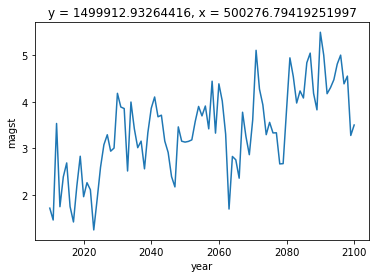

In [20]:
ds.magst.sel(x=5e5, y=1.5e6, method="nearest").plot()

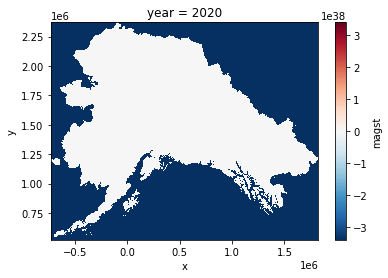

In [17]:
ds.magst.sel(year=2020).plot()